----------------------------------
       1.Data Selection           
----------------------------------

    Id       RI     Na    Mg    Al     Si     K    ca   Ba    Fe  Glass
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00      1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00      1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00      1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00      1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00      1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26      1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00      1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00      1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00      1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11      1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24      1
11  12  1.51763  12.80  3.66  

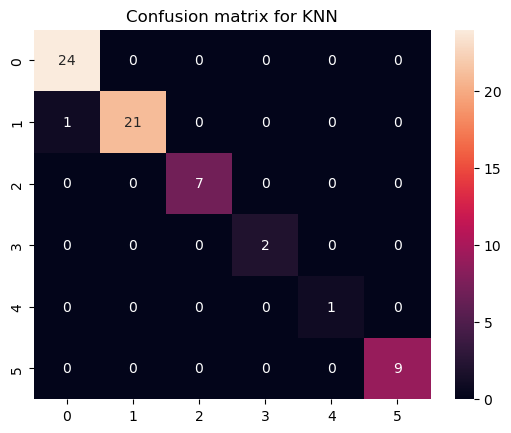

----------------------------------------
SUPPORT VECTOR MACHINE --> SVM
------------------------------------

1. Accuracy = 86.15384615384616

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           2       0.75      1.00      0.86        21
           3       0.00      0.00      0.00         7
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1
           7       0.90      1.00      0.95         9

    accuracy                           0.86        65
   macro avg       0.55      0.66      0.60        65
weighted avg       0.77      0.86      0.81        65



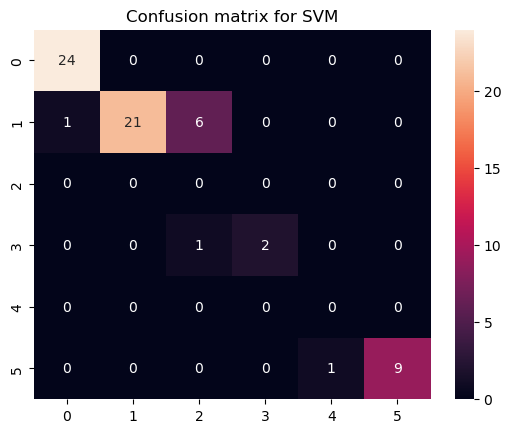

----------------------------------------
PREDICTION 
------------------------------------

---------------------------------------------------------
[0] Glass Type = building_windows_non_float_processed
--------------------------------------------------------
---------------------------------------------------------
[1]  Glass Type = headlamps
--------------------------------------------------------
---------------------------------------------------------
[2] Glass Type = building_windows_non_float_processed
--------------------------------------------------------
---------------------------------------------------------
[3] Glass Type = building_windows_non_float_processed
--------------------------------------------------------
--------------------------------------------------
[4]  Glass Type = building_windows_float_processed
---------------------------------------------------


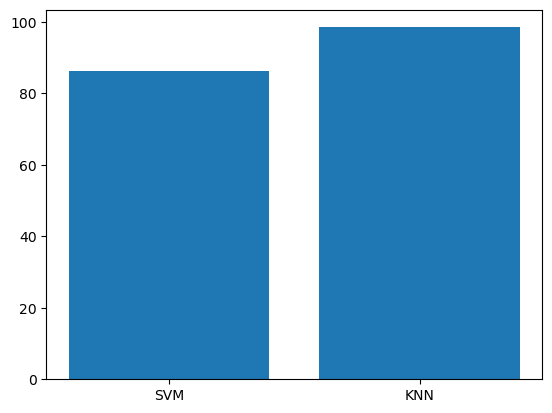

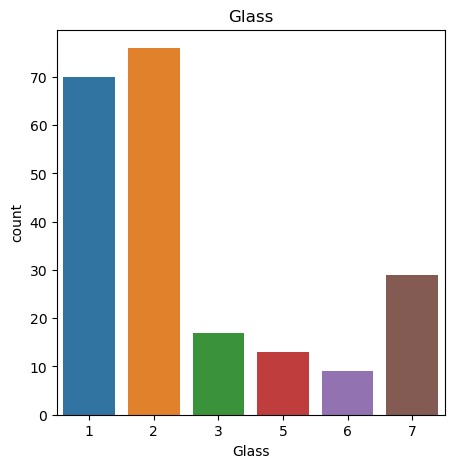

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("glass.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))

#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("     Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()



#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('Glass',axis=1)
y=data_frame['Glass']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("--------------------------------------------")
print("Data Splitting")
print("--------------------------------------------")
print()
print("Total No.of data's in dataset  : ", data_frame.shape[0])
print()
print("Total No.of training data's   : ", X_train.shape[0])
print()
print("Total No.of testing data's    : ", X_test.shape[0])

#=============================== 4.CLASSIFICATION============================

# === K NEAREST NEIGHBOUR =====


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
 
# fit the regressor with x and y data
knn.fit(X_train, y_train) 

Y_pred_knn = knn.predict(X_test)

from sklearn import metrics

Accuracy_knn=metrics.accuracy_score(y_test,Y_pred_knn)*100
 
 
print("----------------------------------------")
print("K NEAREST NEIGHBOUR --> KNN")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_knn )
print()
print(metrics.classification_report(y_test,Y_pred_knn))

# === CONFUSION MATRIX ===
import seaborn as sns
cm_knn=metrics.confusion_matrix(Y_pred_knn,y_test)

sns.heatmap(cm_knn, annot=True)
plt.title("Confusion matrix for KNN")
plt.show()


# ========== SUPPORT VECTOR MACHINE ==========


from sklearn import svm

svmm = svm.SVC()
 
# fit the regressor with x and y data
svmm.fit(X_train, y_train) 

Y_pred_svmm = svmm.predict(X_test)

from sklearn import metrics

Accuracy_svm=metrics.accuracy_score(y_test,Y_pred_svmm)*100
 
 
print("----------------------------------------")
print("SUPPORT VECTOR MACHINE --> SVM")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_svm )
print()
print(metrics.classification_report(y_test,Y_pred_svmm))


# === CONFUSION MATRIX ===
import seaborn as sns
cm_svm=metrics.confusion_matrix(Y_pred_svmm,y_test)

sns.heatmap(cm_svm, annot=True)
plt.title("Confusion matrix for SVM")
plt.show()



# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if Y_pred_knn[i]==1:
        print("--------------------------------------------------")
        print([i]," Glass Type = building_windows_float_processed")
        print("---------------------------------------------------")
    elif Y_pred_knn[i]==2:
        print("---------------------------------------------------------")
        print([i],"Glass Type = building_windows_non_float_processed")
        print("--------------------------------------------------------")        
    elif Y_pred_knn[i]==3:
        print("---------------------------------------------------------")
        print([i]," Glass Type = vehicle_windows_float_processed")
        print("--------------------------------------------------------")        
    elif Y_pred_knn[i]==4:
        print("---------------------------------------------------------")
        print([i],"Glass Type = vehicle_windows_non_float_processed  ")
        print("--------------------------------------------------------")        
    elif Y_pred_knn[i]==5:
        print("---------------------------------------------------------")
        print([i]," Glass Type = containers")
        print("--------------------------------------------------------")        
    elif Y_pred_knn[i]==6:
        print("---------------------------------------------------------")
        print([i],"Glass Type = tableware")
        print("--------------------------------------------------------")        
    elif Y_pred_knn[i]==7:
        print("---------------------------------------------------------")
        print([i]," Glass Type = headlamps")
        print("--------------------------------------------------------")        


# ===== COMPARISON =====

vals=[Accuracy_svm,Accuracy_knn]
inds=range(len(vals))
labels=["SVM","KNN"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Glass")
sns.countplot(x='Glass',data=data_frame)
plt.show()
